In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
target = "charges"

In [4]:
X = df.drop(columns=target)

In [5]:
X.head()

,age,gender,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [13]:
sorted(X.region.unique())

['northeast', 'northwest', 'southeast', 'southwest']

In [11]:
X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
age         1338 non-null int64
gender      1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [6]:
y = df[target]

In [7]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [8]:
from sklearn import preprocessing, model_selection

In [107]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_dummy, y , test_size = 0.3, random_state = 1)

In [15]:
import numpy as np

In [106]:
np.random.seed(111)
np.random.randint(0, 10, 5)

array([4, 4, 4, 6, 3])

In [108]:
from sklearn import linear_model

In [162]:
est = linear_model.LinearRegression()
est.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
est.intercept_

6.98218020942376

In [133]:
y_test_pred = est.predict(X_test)
y_train_pred = est.predict(X_train)

In [112]:
summary = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})

In [113]:
summary["error"] = summary.prediction - summary.actual

In [114]:
summary.head()

,actual,prediction,error
559,1646.4297,4610.315541,2963.885841
1087,11353.2276,12887.893880,1534.666280
1020,8798.5930,12573.948752,3775.355752
460,10381.4787,13197.836626,2816.357926
802,2103.0800,629.337182,-1473.742818


In [115]:
mse = (summary.error ** 2).mean()

In [116]:
mse

36761456.352013245

In [118]:
rmse

6063.122656850449

In [119]:
sse = (summary.error ** 2).sum()

In [120]:
sst = ((y_train.mean() - y_test) ** 2).sum()

In [121]:
r2 = 1 - sse/sst
r2

0.7405997304511027

In [122]:
from sklearn import metrics

In [124]:
metrics.r2_score(y_test, y_test_pred)

0.7405989316927212

In [125]:
sst = ((y_test.mean() - y_test) ** 2).sum()

In [126]:
r2 = 1 - sse/sst
r2

0.7405989316927213

In [127]:
import matplotlib.pyplot as plt

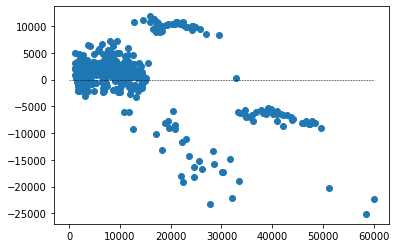

In [131]:
plt.scatter(summary.actual, summary.error)
plt.hlines([0], 0, 60000, linestyles="--", lw = 0.5)

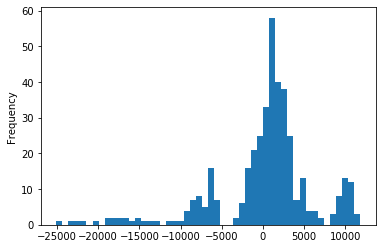

In [132]:
summary.error.plot.hist(bins = 50)

In [136]:
print("r2 training: ", metrics.r2_score(y_train, y_train_pred))
print("r2 test: ", metrics.r2_score(y_test, y_test_pred))

print("rmse train: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)
print("rmse test: ", metrics.mean_squared_error(y_test, y_test_pred)** 0.5)

r2 training:  0.7545557492633161
r2 test:  0.7405989316927212
rmse train:  6039.6018713245385
rmse test:  6063.12265685045


In [169]:
target = "charges"

X = df.drop(columns=target)
X_dummy = pd.get_dummies(X, drop_first=True)

y = df[target]

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_dummy, y , test_size = 0.3, random_state =1)

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_test_pred = est.predict(X_test)
y_train_pred = est.predict(X_train)

print("r2 training: ", metrics.r2_score(y_train, y_train_pred))
print("r2 test: ", metrics.r2_score(y_test, y_test_pred))

print("rmse train: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)
print("rmse test: ", metrics.mean_squared_error(y_test, y_test_pred)** 0.5)




r2 training:  0.7545557492633161
r2 test:  0.7405989316927211
rmse train:  6039.6018713245385
rmse test:  6063.122656850451


In [170]:
pd.DataFrame({"feature": X_dummy.columns, "coeff ":  est.coef_})

,feature,coeff
0,age,3528.982731
1,bmi,1961.655208
2,children,421.550164
3,gender_male,-141.359110
4,smoker_yes,9733.786883
5,region_northwest,-129.545886
6,region_southeast,-414.541483
7,region_southwest,-379.095344


In [138]:
X_dummy

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [166]:
target = "charges"

X = df.drop(columns=target)
X["high_bmi"] = np.where(X.bmi>33, 1, 0)
X["high_bmi"] = np.where(X.age>60, 1, 0)
X_dummy = pd.get_dummies(X, drop_first=True)

y = np.log(df[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_dummy, y , test_size = 0.3, random_state =1)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)


scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_test_pred = est.predict(X_test)
y_train_pred = est.predict(X_train)

print("r2 training: ", metrics.r2_score(y_train, y_train_pred))
print("r2 test: ", metrics.r2_score(y_test, y_test_pred))

print("rmse train: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)
print("rmse test: ", metrics.mean_squared_error(y_test, y_test_pred)** 0.5)




r2 training:  0.8318619149405777
r2 test:  0.8673224620900684
rmse train:  0.37725515061860054
rmse test:  0.3340755865525741


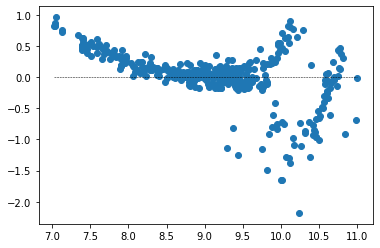

In [148]:
plt.scatter(y_test, y_test_pred - y_test)
plt.hlines([0], y_test.min(), y_test.max(), linestyles="--", lw = 0.5)

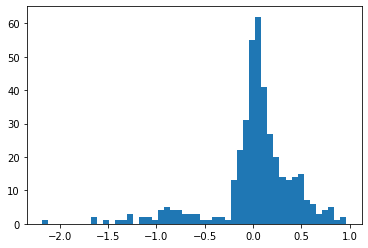

In [150]:
plt.hist(y_test_pred - y_test, bins = 50);

In [155]:
np.random.seed(1)
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
a = np.random.randint(0, 10, (4, 3))
poly.fit_transform(a)

array([[ 5.,  8.,  9., 25., 40., 45., 64., 72., 81.],
       [ 5.,  0.,  0., 25.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  7.,  6.,  1.,  7.,  6., 49., 42., 36.],
       [ 9.,  2.,  4., 81., 18., 36.,  4.,  8., 16.]])

In [154]:
a

array([[5, 8, 9],
       [5, 0, 0],
       [1, 7, 6],
       [9, 2, 4]])

In [160]:
from sklearn import pipeline

In [167]:
target = "charges"

X = df.drop(columns=target)
X["high_bmi"] = np.where(X.bmi>33, 1, 0)
X["high_bmi"] = np.where(X.age>60, 1, 0)
X_dummy = pd.get_dummies(X, drop_first=True)

y = np.log(df[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_dummy, y , test_size = 0.3, random_state =1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])


pipe.fit(X_train, y_train)

y_test_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)

print("r2 training: ", metrics.r2_score(y_train, y_train_pred))
print("r2 test: ", metrics.r2_score(y_test, y_test_pred))

print("rmse train: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)
print("rmse test: ", metrics.mean_squared_error(y_test, y_test_pred)** 0.5)


r2 training:  0.8318619149405777
r2 test:  0.8673224620900684
rmse train:  0.37725515061860054
rmse test:  0.3340755865525741


ValueError: arrays must all be same length